In [1]:
from bluepysnap import Circuit, Simulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from voxcell.nexus.voxelbrain import Atlas
import itertools
from tqdm import tqdm
from scipy import sparse
import blueetl

In [2]:
config_path = "/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/sonata/circuit_config.json"
circuit = Circuit(config_path)

In [3]:
nodes = circuit.nodes['hippocampus_neurons']
edges = circuit.edges['hippocampus_neurons__hippocampus_neurons__chemical_synapse']
projections = circuit.edges['CA3_projections__hippocampus_neurons__chemical_synapse']

In [4]:
atlas = Atlas.open(circuit.config['atlas'])
flatmap_lt = atlas.load_data('flatmap_lt')

In [5]:
ca1_synaptome_dir = circuit.config['data']['local_synaptome']
sc_synaptome_dir = circuit.config['data']['projection_synaptome']

In [21]:
proj_nodes = circuit.nodes['hippocampus_projections']

In [20]:
proj = circuit.edges['CA3_projections__hippocampus_neurons__chemical_synapse']

In [25]:
target_ids = nodes.ids('slice10')

In [27]:
target_ids

array([    57,     58,    146, ..., 456312, 456326, 456351])

In [29]:
CA3_sources_of_one = proj.afferent_nodes(target_ids[-1])

In [33]:
CA3_sources_of_one

array([1000002, 1000003, 1000019, ..., 1267182, 1267199, 1267208])

In [31]:
CA3_sources_of_one[0]

1000002

In [34]:
# proj.efferent_nodes(2) # doesnt work : BluepySnapError: CA3_projections not a <class 'bluepysnap.nodes.nodes.Nodes'> population.

In [35]:
sc_synaptome = sparse.load_npz(sc_synaptome_dir)

In [36]:
sc_synaptome.shape

(267238, 456378)

In [37]:
efferents_of_one_sc_fiber = sc_synaptome[2,:]

In [51]:
fiber_in_slice = np.intersect1d(efferents_of_one_sc_fiber.nonzero()[1],target_ids)

In [56]:
for i in fiber_in_slice:
    print(i+1,end=',')

2115,2170,2498,3222,4508,4710,4885,5112,7339,7478,7554,9123,9350,9613,9985,10046,12311,13297,15299,15400,15845,15852,16649,17110,17866,18191,18431,19661,20665,21180,21542,21682,23172,23337,23787,24124,24258,24365,24425,24711,25634,26422,26838,26959,27149,27291,27736,28686,29521,29568,30534,30945,31103,31309,31533,31890,31911,32224,32226,32301,32917,32968,33747,33849,34133,34860,35400,36681,37035,37966,38253,38276,38308,38499,39504,40261,40480,41183,41657,42043,42612,42986,43496,43819,44591,45120,45325,45908,46018,46254,46537,47684,48421,49147,51322,51571,51929,52485,52525,52712,52932,52934,53457,53788,54296,56675,56912,57504,57511,57957,59335,59474,59685,60183,60315,60895,62179,62327,62961,63152,63728,63838,64223,64434,66026,66673,67635,68849,68898,71412,72719,72810,73221,73646,74215,74222,75314,76447,76470,76743,76759,77029,78281,78967,79352,79408,80452,80870,82218,82685,82688,83648,84283,85035,85950,87047,87397,87557,87949,88064,88148,89022,89395,89430,89947,90170,92108,92772,92907,9

In [58]:
len(efferents_of_one_sc_fiber.nonzero()[1])

32528

In [61]:
for idx,i in enumerate(efferents_of_one_sc_fiber.nonzero()[1]):
    print(i+1,end=',')
    if idx>1000:
        break

6,318,332,890,897,901,925,969,1010,1027,1057,1069,1093,1144,1149,1150,1208,1210,1242,1254,1264,1269,1271,1276,1278,1303,1306,1308,1328,1337,1352,1357,1360,1364,1384,1404,1407,1428,1446,1482,1531,1561,1589,1605,1628,1652,1656,1667,1686,1689,1699,1726,1736,1770,1778,1802,1810,1843,1864,1879,1892,1914,1933,1936,1939,1945,1978,1988,2016,2024,2045,2049,2065,2071,2073,2074,2086,2100,2113,2114,2115,2134,2156,2158,2164,2170,2175,2183,2187,2190,2208,2222,2234,2241,2242,2261,2262,2273,2274,2283,2288,2297,2302,2325,2352,2355,2358,2364,2367,2378,2402,2420,2427,2448,2453,2469,2477,2478,2498,2501,2526,2527,2532,2535,2537,2540,2548,2574,2578,2581,2582,2590,2620,2640,2648,2663,2665,2685,2686,2689,2696,2718,2752,2753,2755,2769,2770,2788,2804,2817,2818,2833,2837,2846,2862,2898,2927,2943,2952,2953,2974,3019,3037,3038,3042,3078,3085,3112,3122,3130,3153,3162,3182,3186,3222,3257,3261,3267,3272,3290,3306,3388,3415,3432,3444,3469,3472,3474,3476,3484,3495,3511,3556,3557,3562,3567,3575,3583,3605,3628,3652,3692,

In [47]:
len(fiber_in_slice) / len(target_ids)

0.0718192627824019

In [17]:
[i for i in proj.__dir__() if not i.startswith('_')]

['name',
 'size',
 'type',
 'source_in_edges',
 'target_in_edges',
 'config',
 'property_names',
 'container_property_names',
 'property_values',
 'property_dtypes',
 'ids',
 'get',
 'positions',
 'orientations',
 'count',
 'morph',
 'models',
 'h5_filepath',
 'spatial_segment_index']

In [8]:
ca1_synaptome = sparse.load_npz(ca1_synaptome_dir)

In [9]:
nodes_by_mtype = nodes.get().mtype.values

In [10]:
cylinder = nodes.get('cylinder300')

In [12]:
def get_connection_prob(nodes, pre_mtype, post_mtype,within_target='cylinder300',conn_matrix=ca1_synaptome):
    target_df = nodes.get(within_target)
    pre_indices = target_df.etl.q(mtype=pre_mtype).index.values
    post_indices = target_df.etl.q(mtype=post_mtype).index.values
    pre2post = ca1_synaptome[pre_indices,:][:,post_indices]
    return pre2post.count_nonzero() / (pre2post.shape[0] * pre2post.shape[1])

In [14]:
num_mtypes = np.unique(nodes_by_mtype).shape[0]
mtypes = np.unique(nodes_by_mtype)
conn_prob_matrix = np.zeros((num_mtypes,num_mtypes))
for mt1,mt2 in tqdm(itertools.product(mtypes,mtypes)):
    # get indices of mt1 and mt2
    mt1_ind,mt2_ind = np.where(mtypes == mt1)[0], np.where(mtypes == mt2)[0]
    conn_prob_matrix[mt1_ind,mt2_ind] = get_connection_prob(nodes,mt1,mt2,within_target='cylinder300',conn_matrix=ca1_synaptome)

144it [04:12,  1.75s/it]


In [15]:
#convert matrix to df
conn_prob_df = pd.DataFrame(conn_prob_matrix,index=mtypes,columns=mtypes)

In [136]:
conn_prob_df.to_csv('conn_prob_cylinder300.csv')

In [38]:
conn_prob_exp = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/bioname/connection_probability.txt',sep='\t',header=0)
sorted_mtypes = ['SLM_PPA','SR_SCA','SP_AA','SP_BS','SP_CCKBC','SP_Ivy','SP_PC','SP_PVBC','SO_BP','SO_BS','SO_OLM','SO_Tri']
sorted_indices = [np.where(mtypes == mt)[0][0] for mt in sorted_mtypes]

exp_pairs= []
for i,j in zip(conn_prob_exp.Pre,conn_prob_exp.Post):
    exp_pairs.append((i,j))
exp_pairs = np.unique(exp_pairs,axis=0)
extra_pairs = [('SP_PC','SP_BS'),('SP_PC','SO_BS')]
exp_pairs = np.concatenate([exp_pairs,extra_pairs])

valid_indices_from_pairs = np.where(np.isin(exp_pairs, sorted_mtypes).all(axis=1))
comparable_indices = []
for i,j in exp_pairs[valid_indices_from_pairs]:
    comparable_indices.append((sorted_mtypes.index(j), sorted_mtypes.index(i)))

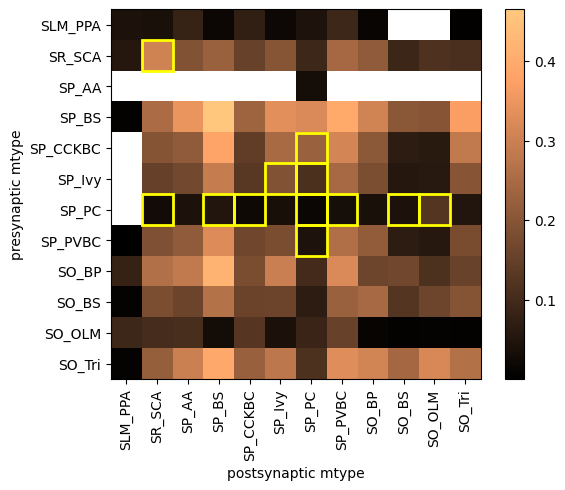

In [40]:
# imshow conn prob where 0.0 values are represented as blank
# order of mtypes based on SLM,SR,SP,SO
conn_prob_matrix = np.array(conn_prob_df)
conn_prob_matrix[conn_prob_matrix == 0.0] = np.nan

sorted_conn_prob_matrix = conn_prob_matrix[sorted_indices,:][:,sorted_indices]
plt.imshow(sorted_conn_prob_matrix,cmap='copper')

# add yellow square to pre_mtype=SP_PC and post_mtype=SR_SCA

# Highlight comparable values
for i, j in comparable_indices:
    plt.gca().add_patch(plt.Rectangle((i - 0.5, j - 0.5), 1, 1, fill=False, edgecolor='yellow', linewidth=2))

_=plt.xticks(np.arange(0,12),sorted_mtypes,rotation=90)
_=plt.yticks(np.arange(0,12),sorted_mtypes)
plt.xlabel('postsynaptic mtype')
plt.ylabel('presynaptic mtype')
_=plt.colorbar()



In [50]:
def get_num_syns_per_connection(nodes, pre_mtype, post_mtype,within_target='cylinder300',conn_matrix=ca1_synaptome):
    target_df = nodes.get(within_target)
    pre_indices = target_df.etl.q(mtype=pre_mtype).index.values
    post_indices = target_df.etl.q(mtype=post_mtype).index.values
    pre2post = ca1_synaptome[pre_indices,:][:,post_indices]
    return pre2post.sum() / pre2post.count_nonzero()

In [48]:
mtype_synaptome = np.zeros((num_mtypes,num_mtypes))
for mt1,mt2 in tqdm(itertools.product(mtypes,mtypes)):
    # get indices of mt1 and mt2
    mt1_ind,mt2_ind = np.where(mtypes == mt1)[0], np.where(mtypes == mt2)[0]
    mtype_synaptome[mt1_ind,mt2_ind] = get_num_syns_per_connection(nodes,mt1,mt2,within_target='cylinder300',conn_matrix=ca1_synaptome)

2it [00:03,  1.85s/it]/tmp/ipykernel_24336/280809871.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return pre2post.sum() / pre2post.count_nonzero()
3it [00:05,  1.79s/it]/tmp/ipykernel_24336/280809871.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return pre2post.sum() / pre2post.count_nonzero()
60it [01:51,  1.98s/it]/tmp/ipykernel_24336/280809871.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return pre2post.sum() / pre2post.count_nonzero()
61it [01:53,  1.99s/it]/tmp/ipykernel_24336/280809871.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return pre2post.sum() / pre2post.count_nonzero()
62it [01:55,  1.99s/it]/tmp/ipykernel_24336/280809871.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return pre2post.sum() / pre2post.count_nonzero()
63it [01:57,  1.96s/it]/tmp/ipykernel_24336/280809871.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return pre2post.sum() / pre2pos

In [97]:
nsyns_conn_exp = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/bioname/nsyns_per_conn _20231106.csv',header=0)
# sorted_mtypes = ['SLM_PPA','SR_SCA','SP_AA','SP_BS','SP_CCKBC','SP_Ivy','SP_PC','SP_PVBC','SO_BP','SO_BS','SO_OLM','SO_Tri']
# sorted_indices = [np.where(mtypes == mt)[0][0] for mt in sorted_mtypes]

nsyns_conn_exp_pairs= []
for i,j in zip(nsyns_conn_exp['from'],nsyns_conn_exp['to']):
    nsyns_conn_exp_pairs.append((i,j))
nsyns_conn_exp_pairs = np.unique(nsyns_conn_exp_pairs,axis=0)

valid_indices_from_pairs_spc = np.where(np.isin(nsyns_conn_exp_pairs, sorted_mtypes).all(axis=1))
comparable_indices_spc = []
for i,j in nsyns_conn_exp_pairs[valid_indices_from_pairs_spc]:
    comparable_indices_spc.append((sorted_mtypes.index(j), sorted_mtypes.index(i)))

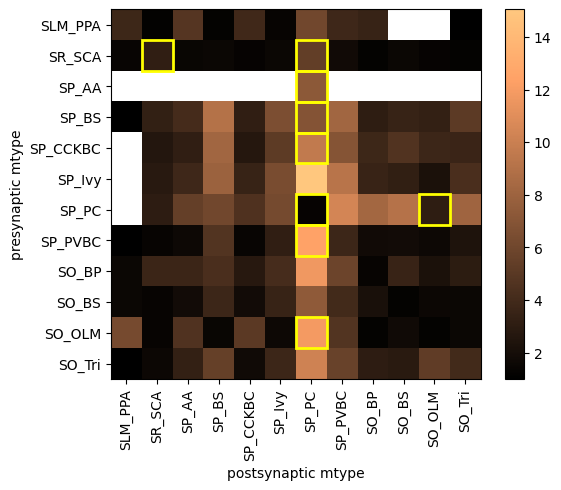

In [99]:
sorted_mtype_synaptome = mtype_synaptome[sorted_indices,:][:,sorted_indices]
plt.imshow(sorted_mtype_synaptome,cmap='copper')

# add yellow square to pre_mtype=SP_PC and post_mtype=SR_SCA

# Highlight comparable values
for i, j in comparable_indices_spc:
    plt.gca().add_patch(plt.Rectangle((i - 0.5, j - 0.5), 1, 1, fill=False, edgecolor='yellow', linewidth=2))

_=plt.xticks(np.arange(0,12),sorted_mtypes,rotation=90)
_=plt.yticks(np.arange(0,12),sorted_mtypes)
plt.xlabel('postsynaptic mtype')
plt.ylabel('presynaptic mtype')
_=plt.colorbar()

In [ ]:
# get degrees